# Imports

In [8]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [9]:
n = 7 # 5~9
label_name = "stat9" # update stat number
layers = [7, 2] # mess with the layers (last layer should be the number of possibilities for this stat)

epochs = 1200 # increase if the loss is still decreasing by the end of training
train_split, test_split = 0.8, 0.2
learning_rate = 0.005 # don't change probably
momentum = 0.9 # don't change probably
batch_size = 64 # higher acc and longer runtime if smaller

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [10]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [11]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 43.012516021728516
Epoch 1, Loss 40.684818506240845
Epoch 2, Loss 36.83106195926666
Epoch 3, Loss 32.62511458992958
Epoch 4, Loss 29.09025552868843
Epoch 5, Loss 26.865293383598328
Epoch 6, Loss 25.260212317109108
Epoch 7, Loss 24.237359032034874
Epoch 8, Loss 23.548316463828087
Epoch 9, Loss 23.177841991186142
Epoch 10, Loss 22.93766911327839
Epoch 11, Loss 22.529802724719048
Epoch 12, Loss 22.191602632403374
Epoch 13, Loss 21.96801109611988
Epoch 14, Loss 21.846555322408676
Epoch 15, Loss 21.277047976851463
Epoch 16, Loss 20.978966936469078
Epoch 17, Loss 20.592501401901245
Epoch 18, Loss 20.46697898209095
Epoch 19, Loss 20.117102071642876
Epoch 20, Loss 19.56479673087597
Epoch 21, Loss 19.377751365303993
Epoch 22, Loss 19.07431037724018
Epoch 23, Loss 18.57754695415497
Epoch 24, Loss 18.140112414956093
Epoch 25, Loss 17.932086169719696
Epoch 26, Loss 17.20352604985237
Epoch 27, Loss 16.9313313215971
Epoch 28, Loss 16.340767443180084
Epoch 29, Loss 16.16223034262657
Epo

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

C:\Users\lewil\AppData\Local\Temp\ipykernel_28212\2152728193.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


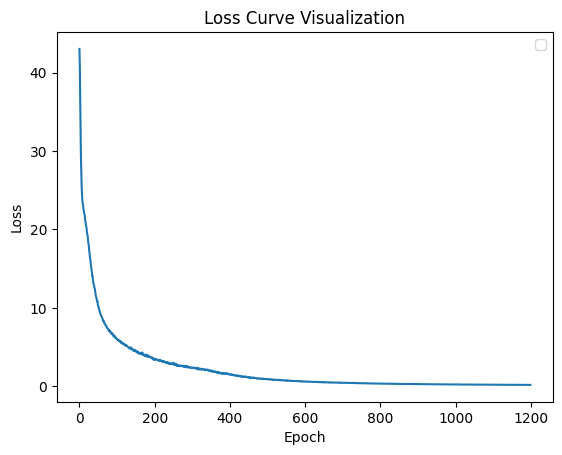

In [12]:
# plot loss vs epoch
plt.plot([i for i in range(epochs)], losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss Curve Visualization')
plt.legend()
plt.savefig(f'figures/loss_curve_{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[910, 12], [9, 77]]


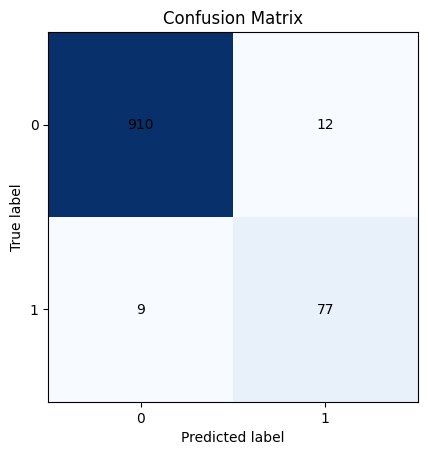

Accuracy for class 0 = 98.69848156182212%
Accuracy for class 1 = 89.53488372093024%
Overall accuracy = 97.91666666666667%


In [13]:
confusion_matrix = evaluate_model(model, test_dataset) # try training_dataset and test_dataset

print(confusion_matrix)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

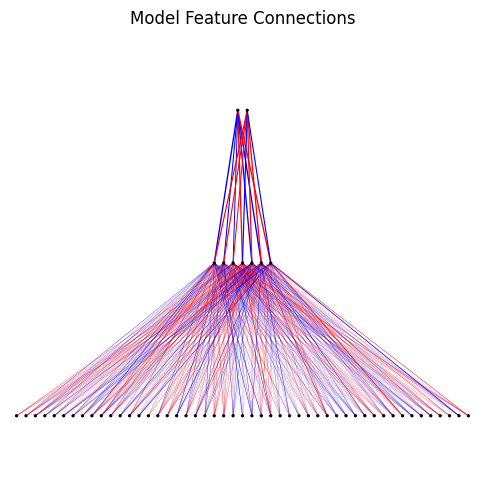

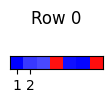

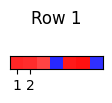

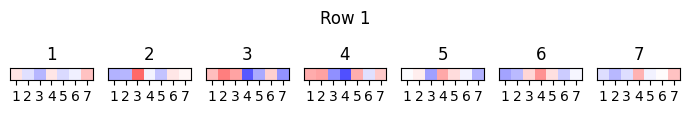

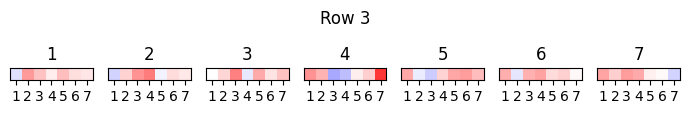

In [14]:
model.plot_connections()

model.plot_heatmap_feature(1, 0)
model.plot_heatmap_feature(1, 1)

model.plot_heatmap_feature(0, 1)
model.plot_heatmap_feature(0, 3)